# Create initial conditions for Pb

June, 2019

In [2]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import datetime
import matplotlib
from mpl_toolkits.basemap import Basemap
import cmocean
import csv
import pandas as pd
import pickle
import sklearn
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

%matplotlib notebook

In [176]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


## Load extended domain:

In [3]:
mesh = nc.Dataset('/ocean/brogalla/GEOTRACES/analysis-birgit/notebooks/ANHA12/ANHA12_mesh1.nc')
mesh_lon = np.array(mesh.variables['nav_lon'])
mesh_lat = np.array(mesh.variables['nav_lat'])
mesh_bathy = np.array(mesh.variables['tmask'][0,:,:,:])
cond = (mesh_bathy > 0.1)
bathy_masked = np.ma.masked_where(cond, mesh_bathy)

<IPython.core.display.Javascript object>


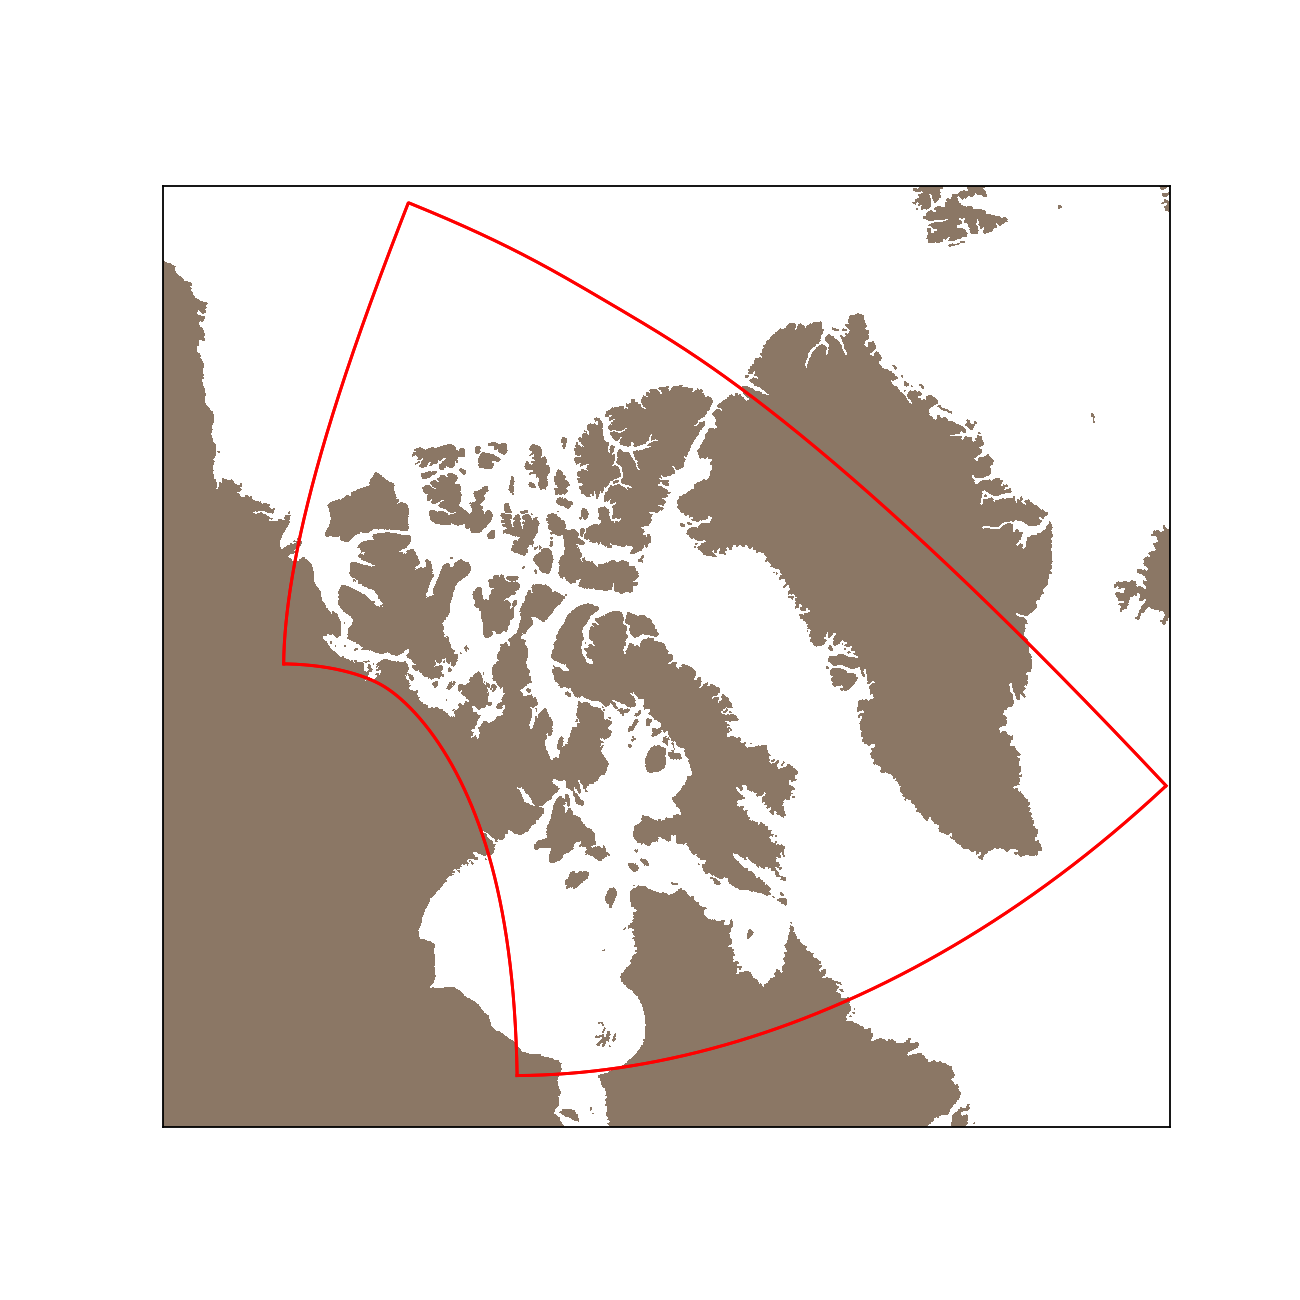

In [4]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Pb.pickle','rb'))
x, y = proj(mesh_lon, mesh_lat)

# sub-domain:
l1=1100
proj.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3);
proj.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r-', lw=1.3);
proj.plot(x[l1,180:799]    , y[l1,180:799]    , 'r-', lw=1.3);
proj.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r-', lw=1.3);
proj.plot(x[2050,180:799]    , y[2050,180:799]    , 'r-', lw=1.3);
proj.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r-', lw=1.3);

### Load ANHA12 fields:

In [5]:
m      = nc.Dataset('/data/brogalla/ANHA12/2015/ANHA12-EXH006_y2015m01d05_gridT.nc')
mdepth = np.array(m.variables['deptht'])
mlons  = np.array(m.variables['nav_lon'])
mlats  = np.array(m.variables['nav_lat'])

### Load Pb data:

In [6]:
folder= '/ocean/brogalla/GEOTRACES/data/'

GEOTRACES cruise CAA (and Canada Basin):

In [159]:
CAA = pd.read_csv(folder+'Pb-paper-data.csv')
CAA_lons     = CAA['station lon'].dropna().astype('float').values[1:]
CAA_lats     = CAA['Station lat'].dropna().astype('float').values[1:]
CAA_names    = CAA['Station names'].dropna().astype('str')
CAA_Pb_short = [CAA['CB3'].dropna().astype('float').values, \
                CAA['CB4'].dropna().astype('float').values, \
                CAA['LS2'].dropna().astype('float').values, \
                CAA['BB1'].dropna().astype('float').values]
CAA_Pb       = [CAA['LS2'].dropna().astype('float').values, \
                CAA['BB1'].dropna().astype('float').values, \
                CAA['BB2'].dropna().astype('float').values, \
                CAA['BB3'].dropna().astype('float').values, \
                CAA['CAA1'].dropna().astype('float').values, \
                CAA['CAA2'].dropna().astype('float').values, \
                CAA['CAA3'].dropna().astype('float').values, \
                CAA['CAA4'].dropna().astype('float').values, \
                CAA['CAA5'].dropna().astype('float').values, \
                CAA['CAA6'].dropna().astype('float').values, \
                CAA['CAA7'].dropna().astype('float').values, \
                CAA['CAA8'].dropna().astype('float').values, \
                CAA['CAA9'].dropna().astype('float').values, \
                CAA['CB1'].dropna().astype('float').values, \
                CAA['CB2'].dropna().astype('float').values, \
                CAA['CB3'].dropna().astype('float').values, \
                CAA['CB4'].dropna().astype('float').values]

GEOTRACES cruise North Atlantic:

In [160]:
Pb_NA = nc.Dataset(folder+'GEOTRACES_IDP2017_v2_Discrete_Sample_Data_5024209a_1.nc')

In [161]:
NA_lats   = np.array(Pb_NA.variables['latitude'])
NA_lons   = np.array(Pb_NA.variables['longitude'])
NA_depths = np.array(Pb_NA.variables['var2'])
NA_time   = np.array(Pb_NA.variables['date_time'])
Pb_NA     = np.array(Pb_NA.variables['var5']) # in pmol/kg

In [162]:
condNA = np.logical_or( Pb_NA > 1e5, Pb_NA < -1e5)
masked_Pb_NA = np.ma.masked_where(condNA, Pb_NA)

Pb from Arctic Ocean:

In [163]:
df = pd.read_csv(folder+'Pb_rob_rember.csv', parse_dates=['DATE']).dropna()

In [164]:
AO_depths = np.array(df['CTDDEPTH'])
AO_lats   = np.array(df['LATITUDE'])
AO_lons   = np.array(df['LONGITUDE'])
AO_dPb    = np.array(df['Pb_(pMol)'])

Map of all cruise Pb station locations:

<IPython.core.display.Javascript object>


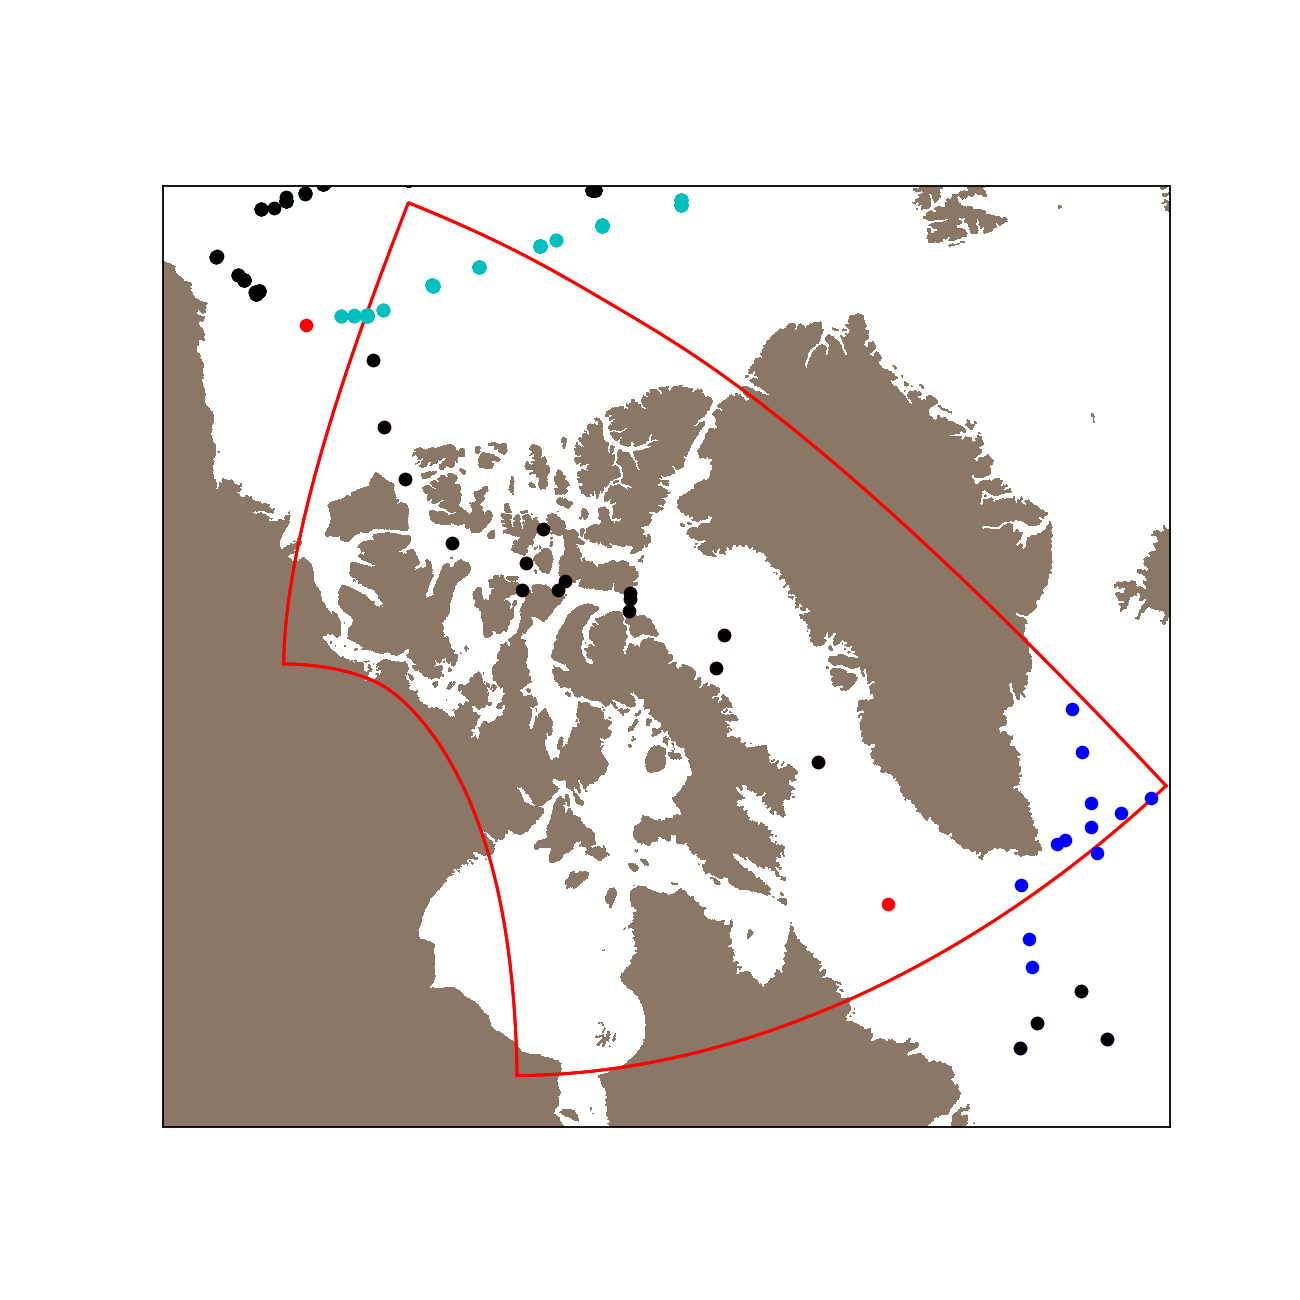

In [53]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Pb.pickle','rb'))
x, y = proj(mesh_lon, mesh_lat)

# sub-domain:
l1=1100
proj.plot(x[l1:2050,799]   , y[l1:2050,799]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,799].T , y[l1:2050,799].T , 'r-', lw=1.3);
proj.plot(x[l1:2050,180]   , y[l1:2050,180]   , 'r-', lw=1.3);
proj.plot(x[l1:2050,180].T , y[l1:2050,180].T , 'r-', lw=1.3);
proj.plot(x[l1,180:799]    , y[l1,180:799]    , 'r-', lw=1.3);
proj.plot(x[l1,180:799].T  , y[l1,180:799].T  , 'r-', lw=1.3);
proj.plot(x[2050,180:799]    , y[2050,180:799]    , 'r-', lw=1.3);
proj.plot(x[2050,180:799].T  , y[2050,180:799].T  , 'r-', lw=1.3);

# Canadian GEOTRACES station locations:
x_CAA, y_CAA = proj(CAA_lons, CAA_lats)
proj.plot(x_CAA, y_CAA, '.r', markersize=10)
proj.plot(x_CAA[1:16], y_CAA[1:16], '.k', markersize=10)

# North Atlantic GEOTRACES station locations:
x_NA, y_NA = proj(NA_lons-360, NA_lats)
proj.plot(x_NA, y_NA, '.b', markersize=10)
proj.plot(x_NA[NA_lats < 55], y_NA[NA_lats < 55], '.k', markersize=10)

# Arctic Ocean station locations:
x_AO, y_AO = proj(AO_lons, AO_lats)
proj.plot(x_AO, y_AO, '.c', markersize=10)
proj.plot(x_AO[0:144], y_AO[0:144], '.k', markersize=10)
proj.plot(x_AO[290:334], y_AO[290:334], '.k', markersize=10)

### Kriging:

(Gaussian process regression)

Kernel --- Rational quadratic

In [165]:
AOlons_surf = AO_lons[AO_depths < 10]
AOlats_surf = AO_lats[AO_depths < 10]
AOdPb_surf  = AO_dPb[AO_depths < 10]*0.001

In [166]:
NA_lons = NA_lons-360
NA_Pb   = Pb_NA
NA_depths = NA_depths
NA_lats = NA_lats

In [167]:
NAlons_surf = NA_lons
NAlats_surf = NA_lats
NAPb_surf   = NA_Pb[:,0]*0.001

Using CAA stations:

In [168]:
lons_combined = np.concatenate((CAA_lons, AOlons_surf, NAlons_surf[NAPb_surf > 0]))
lats_combined = np.concatenate((CAA_lats, AOlats_surf, NAlats_surf[NAPb_surf > 0]))
dPb_combined  = np.concatenate(([CAA_Pb[i][0] for i in range(0,len(CAA_lons))], AOdPb_surf,\
                                NAPb_surf[NAPb_surf > 0]))

X = np.vstack((lons_combined, lats_combined)).transpose()
y = dPb_combined
print(X.shape, y.shape)

(44, 2) (44,)


In [169]:
h = .2  # step size in the mesh

kernel = sklearn.gaussian_process.kernels.RationalQuadratic()
gpc_rbf_isotropic = GaussianProcessRegressor(kernel=kernel).fit(X, y)

# create a mesh to plot in
xx = mesh_lon[1100:2050,180:799]
yy = mesh_lat[1100:2050,180:799]

Z = gpc_rbf_isotropic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape((xx.shape[0], xx.shape[1]))

<IPython.core.display.Javascript object>


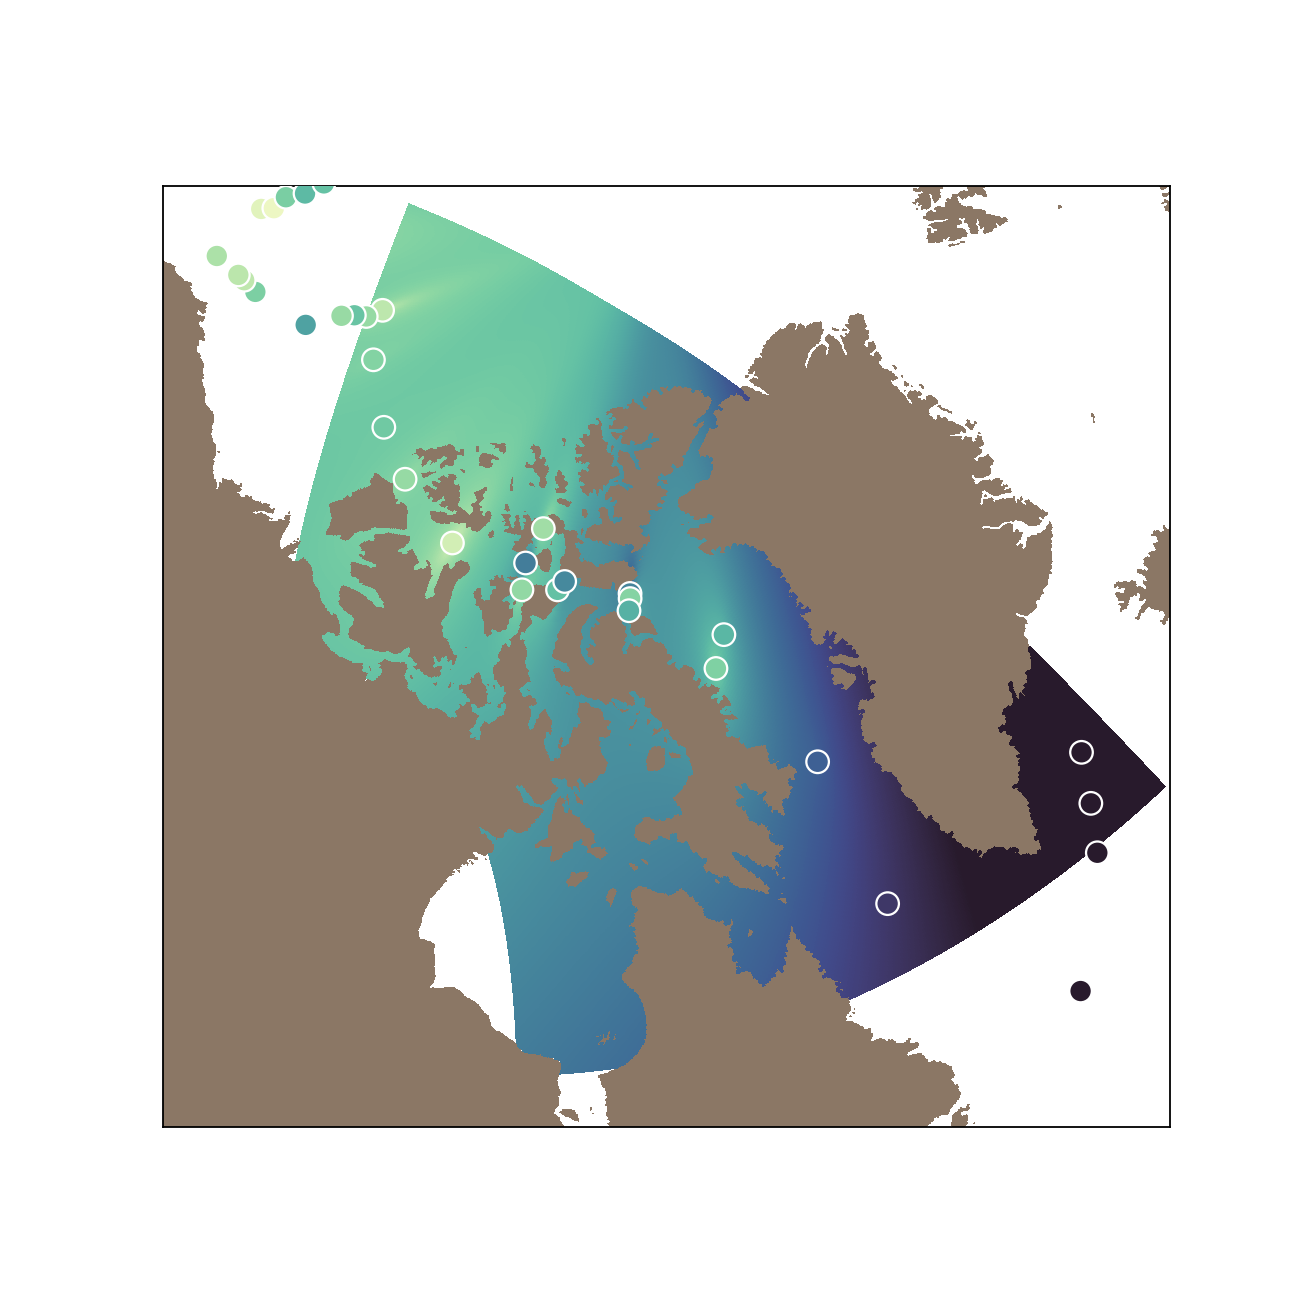

In [170]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Pb.pickle','rb'))

# Canadian GEOTRACES station locations:
x_CAA, y_CAA = proj(X[:,0], X[:,1])
proj.scatter(x_CAA, y_CAA, c=y, s=100, zorder=3, edgecolor='w', vmin=0, vmax=0.02, cmap=cmocean.cm.deep)

x_krig, y_krig = proj(xx, yy)
bathy = mesh_bathy[0,1100:2050,180:799]
cond_bathy = (bathy < 0.1)
Z_masked = np.ma.masked_where(cond_bathy, Z)
CS1 = proj.pcolor(x_krig, y_krig, Z_masked, vmin=0, vmax=0.02, cmap=cmocean.cm.deep, zorder=2)

Not using the CAA stations:

In [172]:
lons_combined = np.concatenate((CAA_lons[0:2], CAA_lons[16:18], AOlons_surf, NAlons_surf[NAPb_surf > 0]))
lats_combined = np.concatenate((CAA_lats[0:2], CAA_lats[16:18], AOlats_surf, NAlats_surf[NAPb_surf > 0]))
dPb_combined  = np.concatenate(([CAA_Pb[1][0], CAA_Pb[2][0], CAA_Pb[3][0]], AOdPb_surf,\
                                NAPb_surf[NAPb_surf > 0]))

X = np.vstack((lons_combined, lats_combined)).transpose()
y = dPb_combined
print(X.shape, y.shape)

(30, 2) (30,)


In [173]:
h = .2  # step size in the mesh

kernel = sklearn.gaussian_process.kernels.RationalQuadratic()
gpc_rbf_isotropic = GaussianProcessRegressor(kernel=kernel).fit(X, y)

xx = mesh_lon[1100:2050,180:799]
yy = mesh_lat[1100:2050,180:799]

Z = gpc_rbf_isotropic.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape((xx.shape[0], xx.shape[1]))

<IPython.core.display.Javascript object>


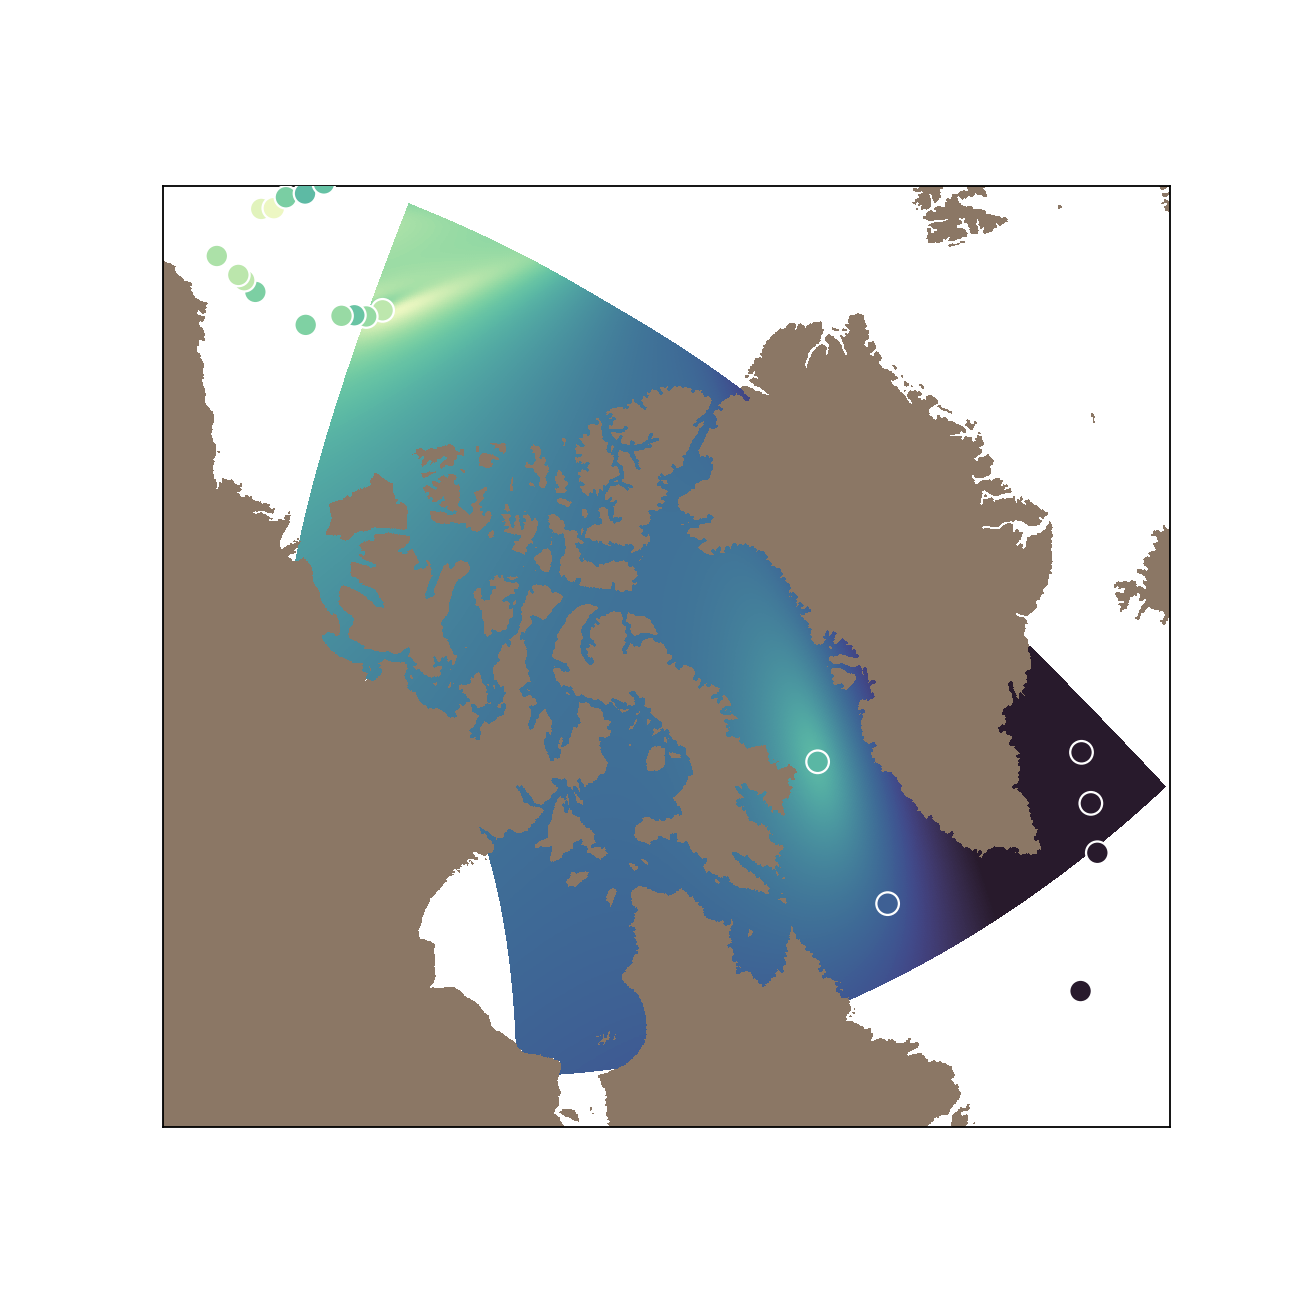

In [174]:
proj = pickle.load(open('/ocean/brogalla/GEOTRACES/analysis-brogalla/maps/surface-Pb.pickle','rb'))

x_CAA, y_CAA = proj(X[:,0], X[:,1])
proj.scatter(x_CAA, y_CAA, c=y, s=100, zorder=3, edgecolor='w', vmin=0, vmax=0.02, cmap=cmocean.cm.deep)

x_krig, y_krig = proj(xx, yy)
bathy = mesh_bathy[0,1100:2050,180:799]
cond_bathy = (bathy < 0.1)
Z_masked = np.ma.masked_where(cond_bathy, Z)
CS1 = proj.pcolor(x_krig, y_krig, Z_masked, vmin=0, vmax=0.02, cmap=cmocean.cm.deep, zorder=2)

### Write NetCDF IC file:

In [175]:
# Check whether any of the values are NaN:
print(np.count_nonzero(np.isnan(ini_pb)))

In [ ]:
c = nc.Dataset('/data/brogalla/ANHA12/2015/ANHA12-EXH006_5d_gridT_y2015m01d05.nc','r')

In [ ]:
# Setup the new NetCDF file:
ncd = nc.Dataset('/ocean/brogalla/GEOTRACES/data/Pb_ini_20190620.nc', 'w', zlib=True)
ncd.createDimension('x',len(c.dimensions['x']))
ncd.createDimension('y',len(c.dimensions['y']))
ncd.createDimension('deptht',size=len(c.variables['deptht']))
ncd.createDimension('time_counter',None)

In [ ]:
# variables
dpb_var = ncd.createVariable('dPb', 'float64', ('time_counter','deptht','y','x'))
dpb_var.units = 'kmol/m3'
dpb_var.long_name = 'Dissolved Pb concentration'  
dpb_var.coordinates = 'nav_lon nav_lat deptht time_counter'
dpb_var[0,:,:,:] = dpb_var_ini

In [ ]:
ncd.close()